**<h1>Your very fist project</h1>**

**You can use Google but please don't use ChatGPT or Gemini or any other generative AI. You are here to learn.**

**Dataset Link:** https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

**M - Malignant (cancerous)<br>
B - Benign (non-cancerous)**

**Instructions:<br>
Step 1:Load the dataset using pandas<br>
Step 2:Explore the dataset by printing out few rows, shape of df, info of df, column names etc.<br>
Step 3: Check for null values and handle them (if any). Drop the Id column.<br>
Step 4: Use your knowledge of feature selection using correlation matrix to select 10 features out of 31. Give proper reasons for the same.<br><br>**
*Use this code:<br>*
*import seaborn as sns<br>*
*df1 = df[ list_of_column_names_required ]<br>*
*dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)<br><br>*
*Select two features from column_list_1 = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean']<br><br>*
*Select 6 features from column_list_2 = ['diagnosis','concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']<br><br>*
*Select 2 features from column_list_3 = ['diagnosis','concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
        'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',]<br><br>*
**Step 5: Exploratory Data Analysis. Think what you can plot which can convey some useful information. One bar plot, one pie chart and one scatter plot is required. Give proper reasoning of what you have plot.<br>
Step 6: Divide df_new (dataframe which only have the selected 10 columns) into X and Y<br>
Step 7: Perform train test split with test_size = 0.2<br>
Step 8: Normalise<br>
Step 9: Train a logistic regression model and print out the classification report (explore from internet) after predicting on X_test<br>
Step 10: Train a SVC and print out the classification report<br>
Step 11: Train KNN and print out the classification report<br>
Step 12: Choose a metric on which you will compare the models. Give proper reason why you chose that metric.<br>
Step 13: Using the above metric, state your best model.<br>
Step 14: Suppose for example SVC was your best model. Now train a new SVC model but this time consider all the columns of the dataset. Follow the same steps to divide the df into X and Y, performing split,etc.<br>
Step 15: Now compare this model with the best model achieved in Step 13.<br>
Step 16: Write in 2 lines what you observe. Can you also tell why you observe?**

**After Step 16, assignment ends. <br>
Please submit on teams before deadline.<br>
HURRAY!! You have made your very first ML project. More to come soon!**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [73]:
df = pd.read_csv('breast-cancer.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
df.shape

(569, 32)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [76]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [78]:
df.drop('id',inplace =True, axis=1)

In [79]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


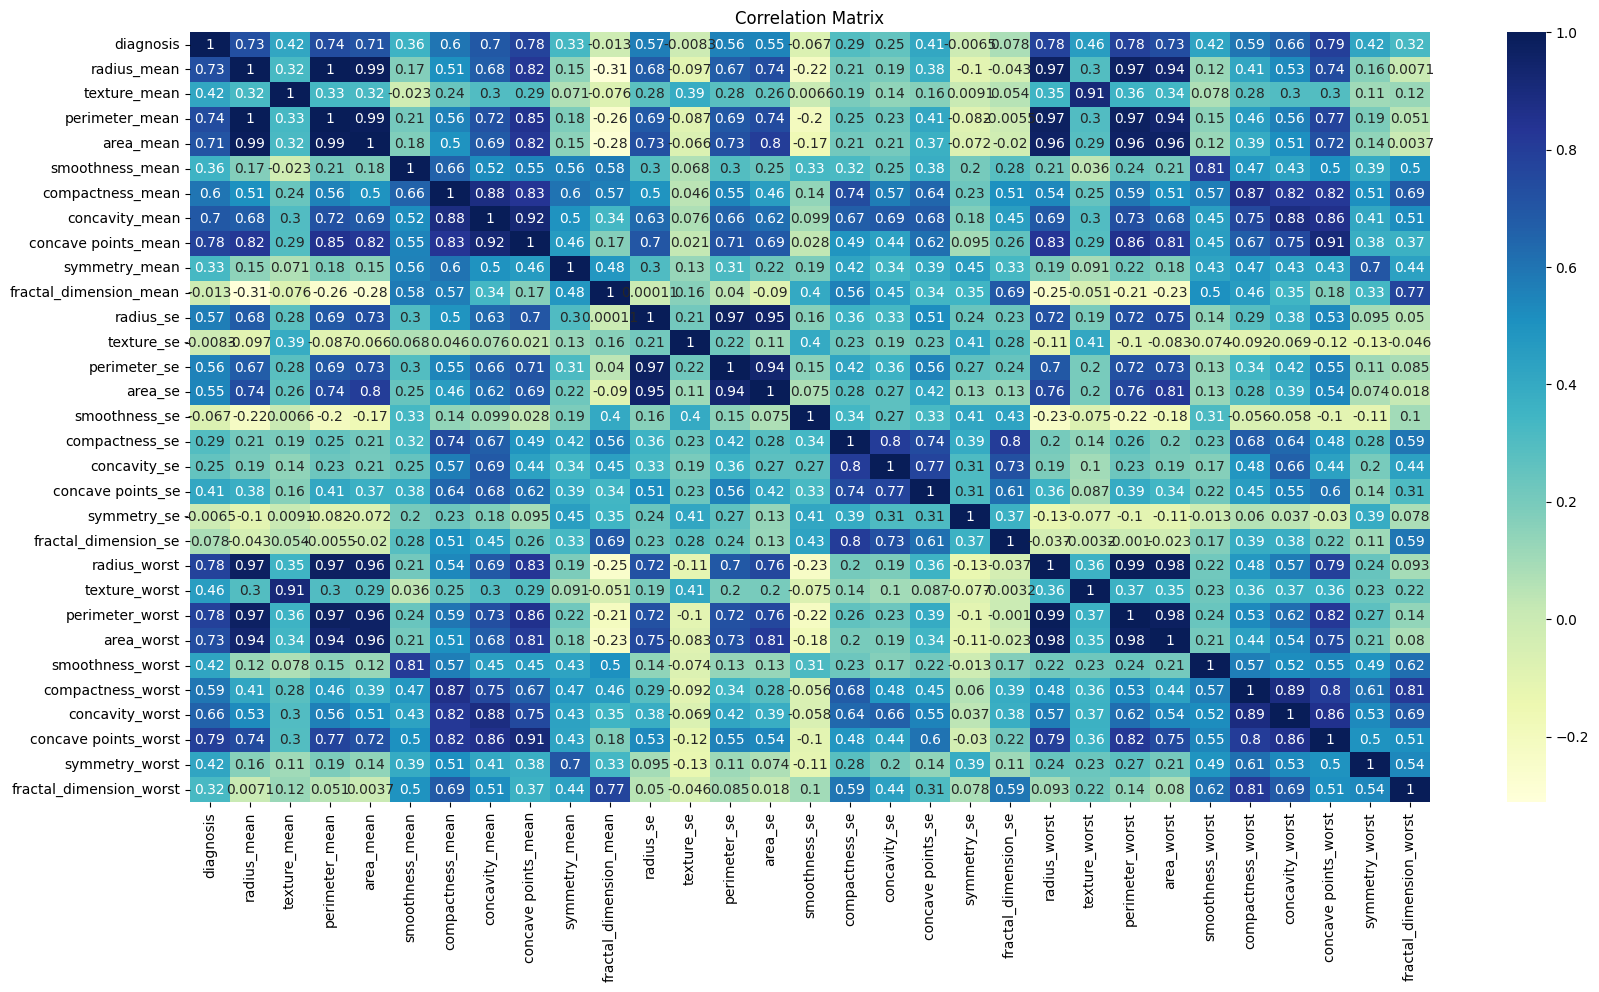

In [95]:
plt.figure(figsize=(20, 10))

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
dataplot.set_title('Correlation Matrix')
plt.show()

In [81]:
column_list_1 = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
column_list_2 = ['diagnosis','concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']
column_list_3 = ['diagnosis','concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',]

def select_features_based_on_correlation(df, column_list, target='diagnosis', num_features=2):
    # Calculate correlation matrix
    corr_matrix = df[column_list].corr()

    # Get absolute correlation with target variable
    target_corr = corr_matrix[target].abs().sort_values(ascending=False)

    # Select top features (excluding the target itself)
    selected_features = target_corr.index[1:num_features+1]
    return selected_features

# Select features
selected_features_1 = select_features_based_on_correlation(df, column_list_1, num_features=2)
selected_features_2 = select_features_based_on_correlation(df, column_list_2, num_features=6)
selected_features_3 = select_features_based_on_correlation(df, column_list_3, num_features=2)

print("Selected features from column_list_1:", selected_features_1.tolist())
print("Selected features from column_list_2:", selected_features_2.tolist())
print("Selected features from column_list_3:", selected_features_3.tolist())


Selected features from column_list_1: ['perimeter_mean', 'radius_mean']
Selected features from column_list_2: ['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst', 'concavity_worst', 'compactness_worst']
Selected features from column_list_3: ['perimeter_worst', 'concave points_mean']


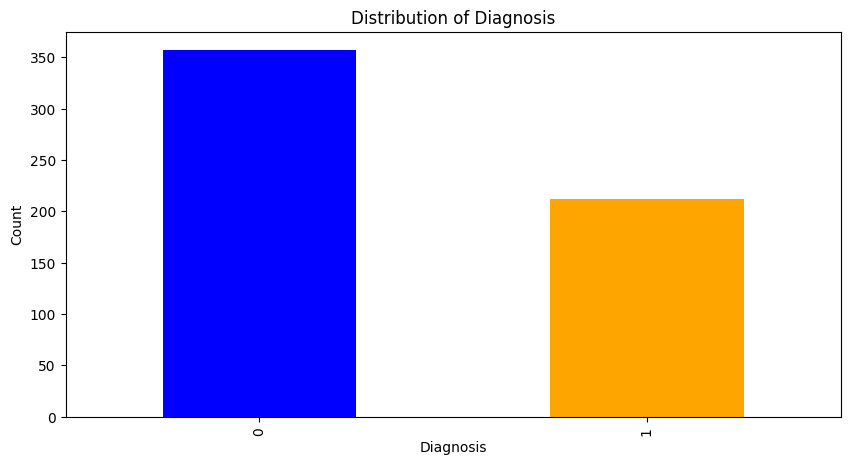

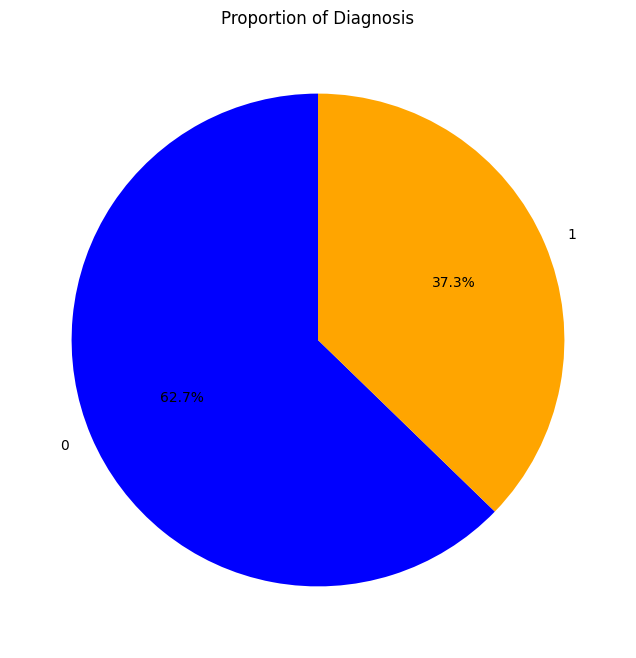

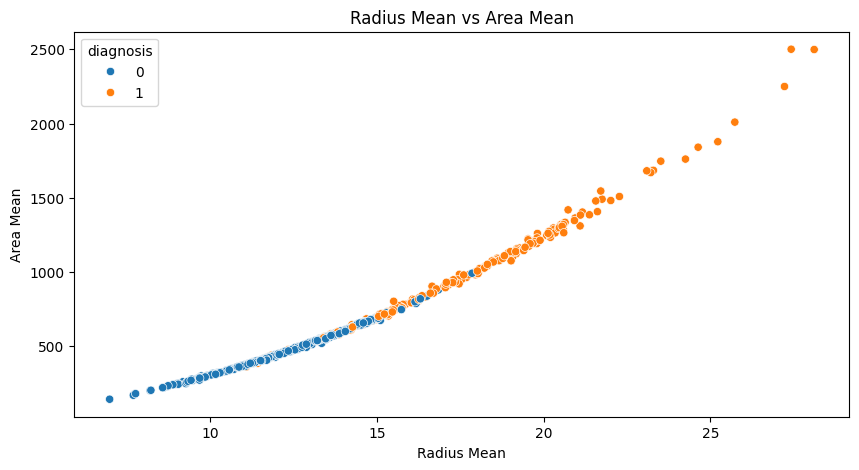

In [82]:


# Bar plot
plt.figure(figsize=(10, 5))
df['diagnosis'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Proportion of Diagnosis')
plt.ylabel('')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df)
plt.title('Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()


In [83]:
df_new = df[['perimeter_mean', 'radius_mean','concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst', 'concavity_worst', 'compactness_worst','perimeter_worst', 'concave points_mean','diagnosis']]
df_new

,perimeter_mean,radius_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_worst,compactness_worst,perimeter_worst,concave points_mean,diagnosis
0,122.80,17.99,0.2654,184.60,25.380,2019.0,0.7119,0.66560,184.60,0.14710,1
1,132.90,20.57,0.1860,158.80,24.990,1956.0,0.2416,0.18660,158.80,0.07017,1
2,130.00,19.69,0.2430,152.50,23.570,1709.0,0.4504,0.42450,152.50,0.12790,1
3,77.58,11.42,0.2575,98.87,14.910,567.7,0.6869,0.86630,98.87,0.10520,1
4,135.10,20.29,0.1625,152.20,22.540,1575.0,0.4000,0.20500,152.20,0.10430,1
...,...,...,...,...,...,...,...,...,...,...,...
564,142.00,21.56,0.2216,166.10,25.450,2027.0,0.4107,0.21130,166.10,0.13890,1
565,131.20,20.13,0.1628,155.00,23.690,1731.0,0.3215,0.19220,155.00,0.09791,1
566,108.30,16.60,0.1418,126.70,18.980,1124.0,0.3403,0.30940,126.70,0.05302,1
567,140.10,20.60,0.2650,184.60,25.740,1821.0,0.9387,0.86810,184.60,0.15200,1


In [84]:
X = df_new.drop('diagnosis', axis=1)
y = df_new['diagnosis']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(455, 10)
(114, 10)


In [85]:
# Normalise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Training logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [87]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [88]:
# Training SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)
svc_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [89]:
print("SVC Classification Report:")
print(classification_report(y_test, svc_pred))

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [91]:
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [92]:
# We'll use F1-score as our metric because it balances precision and recall
# The model with the highest F1-score is our best model

In [93]:
X_full = df.drop('diagnosis', axis=1)
y_full = df['diagnosis']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

model.fit(X_train_full_scaled, y_train_full)
y_full_pred = model.predict(X_test_full_scaled)
print("Logistic Regression  (All Features) Classification Report:")
print(classification_report(y_test_full, y_full_pred))

Logistic Regression  (All Features) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



For **class 0** (likely benign):

$\bullet$Selected Features: Precision 0.99, Recall 0.97, F1-score 0.98

$\bullet$All Features: Precision 0.97, Recall 0.99, F1-score 0.98

For** class 1** (likely malignant):

$\bullet$Selected Features: Precision 0.95, Recall 0.98, F1-score 0.97

$\bullet$All Features: Precision 0.98, Recall 0.95, F1-score 0.96

The model with selected features has a slightly better balance between precision and recall for both classes. It has higher precision for class 0 and higher recall for class 1, which might be preferable in a medical context where we want to minimize false negatives for malignant cases